# **Project Name**    - Fed-Ex Exploratory Data Analysis (EDA)




##### **Project Type**    - EDA

##### **Contribution**    - Individual

##### **Name**            -Mohamed Arshad Ahamed T

# **Project Summary :-**

FedEx Logistics, a leader in global supply chain solutions, handles a vast network of shipments across multiple regions, countries, and industries. This project focuses on conducting an in-depth exploratory data analysis (EDA) on FedEx’s Supply Chain Management System (SCMS) delivery history dataset. The aim is to uncover insights into the efficiency and performance of logistics operations, delivery patterns, cost dynamics, and vendor interactions.

The dataset includes detailed records of purchase orders, shipment modes, vendor agreements, item descriptions, dosage forms, and delivery timelines. Using data visualization, correlation mapping, and outlier detection, this project identifies key factors influencing delivery performance and cost optimization. Specific attention is given to analyzing shipment delays, region-wise performance, INCO term impacts, and identifying logistical bottlenecks.

Through this EDA, we provide actionable insights that can help FedEx streamline operations, reduce freight costs, improve customer satisfaction, and adapt to the increasing demand driven by global eCommerce. The project supports data-driven decision-making for continuous improvement in logistics management.

# **Problem Statement :-**


FedEx Logistics wants to improve its delivery efficiency and reduce operational costs across its global supply chain network. However, the current system may include delays, high-cost shipment modes, and regional inefficiencies that need to be identified and analyzed.



#### **Define Your Business Objective?**

To analyze the SCMS delivery dataset and derive insights that help in identifying performance bottlenecks, reducing delivery times, improving cost-efficiency, and supporting informed decision-making to enhance overall logistics operations at FedEx.

## ***1. Know Your Data***

### Import Libraries:-

In [1]:
# Import Libraries -

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import io

### Dataset Loading:-

In [2]:
# Load Dataset -

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['SCMS_Delivery_History_Dataset.csv']))

# Confirm loading
print(f"Dataset loaded successfully...")


Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset.csv
Dataset loaded successfully...


### Dataset First View:-

In [ ]:
# Dataset First Look -

df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns Count:-

In [ ]:
# Dataset Rows & Columns Count -

print(f"Dataset Shape: {df.shape}")

Dataset Shape: (10324, 33)


### Dataset Information:-

In [ ]:
# Dataset Info-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values:-

In [ ]:
# Dataset Duplicate Value Count -

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Missing Values/Null Values:-

In [ ]:
# Missing Values/Null Values Count -

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price           

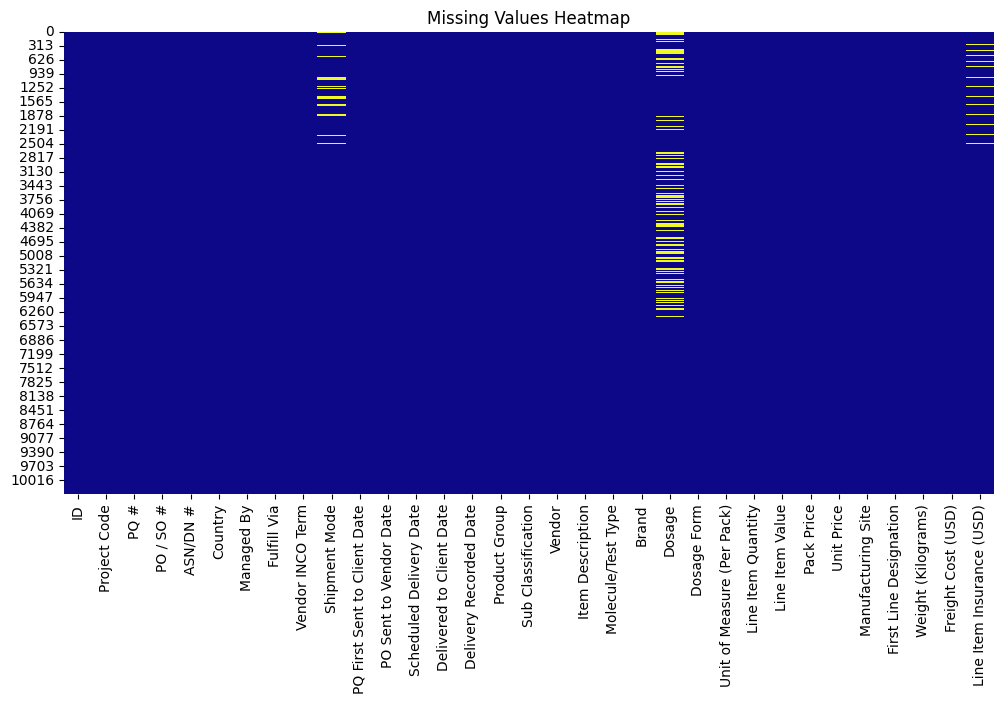

In [ ]:
# Visualizing the missing values -

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**General Information:**

10,324 rows and 33 columns.

**Data Types:**

  4 columns with float64 (numeric data).

  3 columns with int64 (numeric data).

  26 columns with object (categorical/string data).

**Columns:**

Identifiers: There are several identifier columns such as ID, Project Code, PQ #, PO / SO #, and ASN/DN #, which likely serve to uniquely identify shipments or products.

**Date Columns:**

PQ First Sent to Client Date , PO Sent to Vendor Date , Scheduled Delivery Date , Delivered to Client Date , Delivery Recorded Date

These are probably used to track the shipment process and timelines.

**Categorical Features:**

Columns like Country, Managed By, Fulfill Via, Vendor INCO Term, Shipment Mode, Product Group, and others are categorical and likely represent shipment attributes.

**Numeric Features:**

Line Item Quantity, Line Item Value, Pack Price, Unit Price, Weight (Kilograms), Freight Cost (USD), and Line Item Insurance (USD) are numeric columns, representing shipment values, weights, and costs.

**Missing Data:**

Shipment Mode has 360 missing values (about 3.5%).

Dosage has 1,736 missing values (about 16.8%).

Line Item Insurance (USD) has 287 missing values (around 2.8%).

These missing values could affect any analyses or predictions that rely on these columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns -

df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe -

df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description -

**Logistics Data Variables:**

ID: Unique identifier for each logistics record.

Project Code: Code representing the project or initiative tied to the shipment.

PQ #: Price Quotation reference number.

PO/SO #: Purchase Order or Sales Order associated with the shipment.

ASN/DN #: Advanced Shipment Notice or Delivery Note reference.

Country: Destination country for the shipment.

Managed By: Specifies which team manages the project.

Fulfill Via: Method of fulfillment, such as direct drop shipment.

Vendor INCO Term: Incoterms defining the shipment agreement.

Shipment Mode: The mode of transportation used.

PQ First Sent to Client Date: The date the Price Quotation was first sent to the client.

PO Sent to Vendor Date: Date the purchase order was sent to the vendor
Scheduled Delivery: The planned date for delivery.



**Product Data Variables:**

Brand: The brand name of the product.

Dosage: The dosage strength of the pharmaceutical product.

Dosage Form: The form in which the product is delivered.

Unit of Measure (Per Pack): The number of units per pack.

Line Item Quantity: The total number of units shipped.

Line Item Value: The total value of the line item in the shipment.

Pack Price: Price per pack of the item.

Unit Price: Price per individual unit of the item.

Manufacturing Site: The location where the item was manufactured.

First Line Designation: Indicates whether the product is designated for first-line use.

Weight (Kilograms): The weight of the shipment.

Freight Cost (USD): The cost of shipping the item in U.S. dollars.

Line Item Insurance (USD): Insurance cost for the line item, if applicable.

### Check Unique Values for each variable -

In [ ]:
# Check Unique Values for each variable -

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

ID: 10324 unique values
Project Code: 142 unique values
PQ #: 1237 unique values
PO / SO #: 6233 unique values
ASN/DN #: 7030 unique values
Country: 43 unique values
Managed By: 4 unique values
Fulfill Via: 2 unique values
Vendor INCO Term: 8 unique values
Shipment Mode: 4 unique values
PQ First Sent to Client Date: 765 unique values
PO Sent to Vendor Date: 897 unique values
Scheduled Delivery Date: 2006 unique values
Delivered to Client Date: 2093 unique values
Delivery Recorded Date: 2042 unique values
Product Group: 5 unique values
Sub Classification: 6 unique values
Vendor: 73 unique values
Item Description: 184 unique values
Molecule/Test Type: 86 unique values
Brand: 48 unique values
Dosage: 54 unique values
Dosage Form: 17 unique values
Unit of Measure (Per Pack): 31 unique values
Line Item Quantity: 5065 unique values
Line Item Value: 8741 unique values
Pack Price: 1175 unique values
Unit Price: 183 unique values
Manufacturing Site: 88 unique values
First Line Designation: 2 un

## 3. ***Data Wrangling***

### Data Wrangling Code:-

In [ ]:
# ----------------------------
# Step 1: Convert Date Columns
# ----------------------------
print("\nConverting date columns...")
date_cols = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"Converted '{col}' to datetime. Missing: {df[col].isnull().sum()}")

# ----------------------------
# Step 2: Clean Object Columns to Numeric
# ----------------------------
print("\nCleaning numeric columns stored as objects...")
numeric_object_cols = ['Weight (Kilograms)', 'Freight Cost (USD)']

for col in numeric_object_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Cleaned '{col}'. Missing: {df[col].isnull().sum()}")

# ----------------------------
# Step 3: Handle Missing Values (existing columns)
# ----------------------------
print("\nHandling missing values...")

df['Shipment Mode'] = df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0])
print("Filled missing 'Shipment Mode'.")

df['Dosage'] = df['Dosage'].fillna('Unknown')
print("Filled missing 'Dosage'.")

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(
    df['Line Item Insurance (USD)'].median()
)
print("Filled missing 'Line Item Insurance (USD)'.")

for col in ['PQ First Sent to Client Date', 'PO Sent to Vendor Date']:
    df[col] = df[col].fillna(df[col].min())
    print(f"Filled missing '{col}' with earliest available date.")

for col in ['Weight (Kilograms)', 'Freight Cost (USD)']:
    df[col] = df[col].fillna(df[col].median())
    print(f"Filled missing '{col}' with median.")

# ----------------------------
# Step 4: Feature Engineering
# ----------------------------
print("\nCreating new features...")

df['Delivery Delay (Days)'] = (
    df['Delivered to Client Date'] - df['Scheduled Delivery Date']
).dt.days
print("Created 'Delivery Delay (Days)'.")

df['Total Weight (kg)'] = df['Weight (Kilograms)'] * df['Line Item Quantity']
df['Total Weight (kg)'] = df['Total Weight (kg)'].fillna(df['Total Weight (kg)'].median())
print("Calculated 'Total Weight (kg)' and filled missing values.")

df['Computed Unit Price'] = df['Line Item Value'] / df['Line Item Quantity']
print("Calculated 'Computed Unit Price'.")

# ----------------------------
# Step 5: Final Cleanups
# ----------------------------
print("\nFinalizing cleanup...")

df.drop_duplicates(inplace=True)
print("Dropped duplicates.")

df.reset_index(drop=True, inplace=True)
print("Index reset.")

# ----------------------------
# Summary
# ----------------------------
print("\n✔️ Data Wrangling Completed")
print("Final shape:", df.shape)

print("\nMissing values by column:")
print(df.isnull().sum())

# Save cleaned file
df.to_csv("scms_cleaned_final.csv", index=False)
print("\nCleaned data saved to 'scms_cleaned_final.csv'")



Converting date columns...
Converted 'PQ First Sent to Client Date' to datetime. Missing: 2681
Converted 'PO Sent to Vendor Date' to datetime. Missing: 5732
Converted 'Scheduled Delivery Date' to datetime. Missing: 0


<ipython-input-13-9e3c719c03bd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-13-9e3c719c03bd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-13-9e3c719c03bd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-13-9e3c719c03bd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and

Converted 'Delivered to Client Date' to datetime. Missing: 0
Converted 'Delivery Recorded Date' to datetime. Missing: 0

Cleaning numeric columns stored as objects...
Cleaned 'Weight (Kilograms)'. Missing: 3952
Cleaned 'Freight Cost (USD)'. Missing: 4126

Handling missing values...
Filled missing 'Shipment Mode'.
Filled missing 'Dosage'.
Filled missing 'Line Item Insurance (USD)'.
Filled missing 'PQ First Sent to Client Date' with earliest available date.
Filled missing 'PO Sent to Vendor Date' with earliest available date.
Filled missing 'Weight (Kilograms)' with median.
Filled missing 'Freight Cost (USD)' with median.

Creating new features...
Created 'Delivery Delay (Days)'.
Calculated 'Total Weight (kg)' and filled missing values.
Calculated 'Computed Unit Price'.

Finalizing cleanup...
Dropped duplicates.
Index reset.

✔️ Data Wrangling Completed
Final shape: (10324, 36)

Missing values by column:
ID                              0
Project Code                    0
PQ #            

<ipython-input-13-9e3c719c03bd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')



Cleaned data saved to 'scms_cleaned_final.csv'


### What all manipulations have you done and insights you found?

✅ Data Cleaning & Preparation Steps-

1. Converted Date Columns:

Columns like PQ First Sent to Client Date, PO Sent to Vendor Date, etc., were converted to datetime format.

Missing values were present and handled appropriately.

Insight: Standardized date formats enable accurate time-based calculations, trend analyses, and delivery time computations.

2. Cleaned Object Columns with Numeric Data:

Weight (Kilograms) and Freight Cost (USD) were stored as strings (with symbols like $, commas).

Converted to proper numeric types using regex.

Insight: Enables valid mathematical operations and statistical summaries for these cost-related fields.

3. Handled Missing Values:

Shipment Mode filled with mode (most frequent shipment type).

Dosage filled with 'Unknown'.

Line Item Insurance (USD) filled with median.

Missing date fields (PQ, PO) filled with earliest available date.

Weight and Freight Cost filled with medians.

Insight: This preserves as much data as possible for analysis without introducing outliers or biases from incorrect assumptions.

4. Feature Engineering:

Delivery Delay (Days) = Delivered to Client Date – Scheduled Delivery Date

Measures efficiency of delivery.

Insight: Helps identify late shipments and operational bottlenecks.

Total Weight (kg) = Weight × Line Item Quantity

Represents full shipment size.

Insight: Useful for evaluating load capacities and forecasting logistics costs.

Computed Unit Price = Line Item Value / Line Item Quantity

Cross-verifies pricing integrity.

Insight: Can help identify pricing anomalies or errors in the billing data.

5. Final Touches:

Removed duplicates.

Reset the DataFrame index for consistency.

Saved cleaned data to scms_cleaned_final.csv.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

📊 Key Observations and Insights (based on wrangling)-

1.Date Integrity Was a Major Issue:

Many delivery-related date columns had missing or inconsistent values. After cleaning, these can now be used to:

Track supply chain delays

Calculate lead times for procurement

Compare vendor performance over time

2.Significant Missing Values in Weight & Cost:

About 4,000 entries were missing weights and costs initially.

Filling them with medians makes future modeling (e.g., regression or cost prediction) more robust.

3.Potential for Shipment Delay Analysis:

With the Delivery Delay (Days) column, you can now:

Segment shipments as on-time, delayed, or early

Compare across vendors, countries, or shipment modes

Build predictive models to estimate risk of delays

4.Anomalies in Pricing:

The new Computed Unit Price can be compared with Unit Price and Pack Price to flag outliers or inconsistencies.

--------------------------------------------------------------------------------




## ***4. Data Visualization, Storytelling & Experimenting with charts - Understand the relationships between variables***

*UNI-VARIATE ANALYSIS-*

#### Distribution Of Shipment Modes

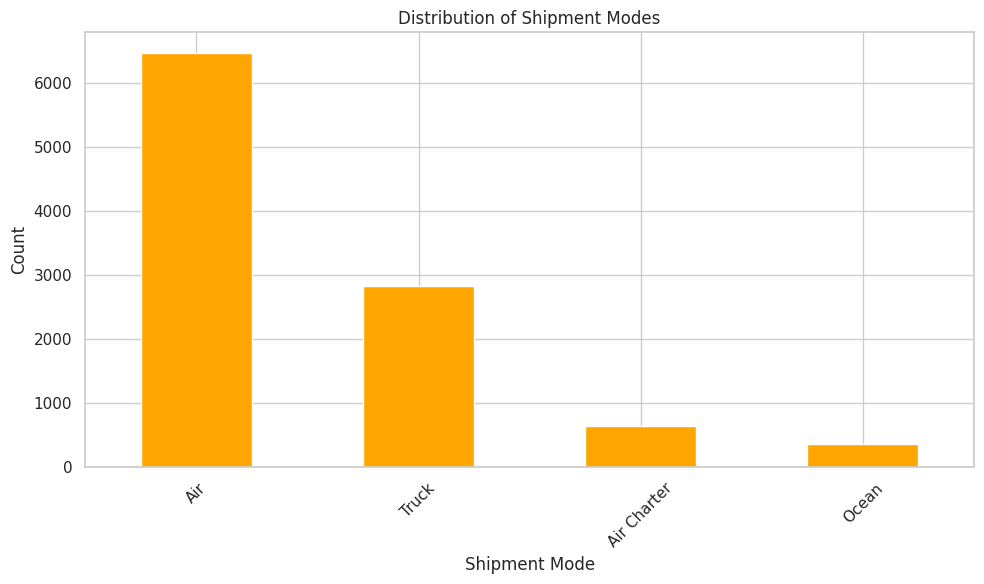

In [ ]:
# Set theme-

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

#Shipment Mode distribution-

df['Shipment Mode'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This bar chart is effective for comparing categorical data. It clearly shows the frequency count of different shipment modes, making it easy to see the relative usage of each transportation method. Bar charts are ideal for this type of discrete data comparison where you need to understand distribution across distinct categories.

#### 2. What is/are the insight(s) found from the chart?

Air shipment is the dominant transportation mode with approximately 6,400 shipments, more than twice the volume of truck shipments.

Truck shipments are the second most common at around 2,800 shipments.

Air Charter and Ocean shipments are used much less frequently, with roughly 600 and 300 shipments respectively.

There's a clear hierarchy in the frequency of shipping methods: Air > Truck > Air Charter > Ocean.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Understanding this distribution allows for capacity planning and resource allocation focused on air and truck shipments.

Identifying the heavy reliance on air shipping could present opportunities for negotiating better rates with carriers.

2.Potential negative impacts:

The heavy dependence on air shipping (which is typically expensive) could indicate higher-than-necessary transportation costs.

Without additional context on shipment values, distances, or urgency requirements, the company might be over-utilizing expensive shipping modes.

#### Top 10 Countries by Shipment Count

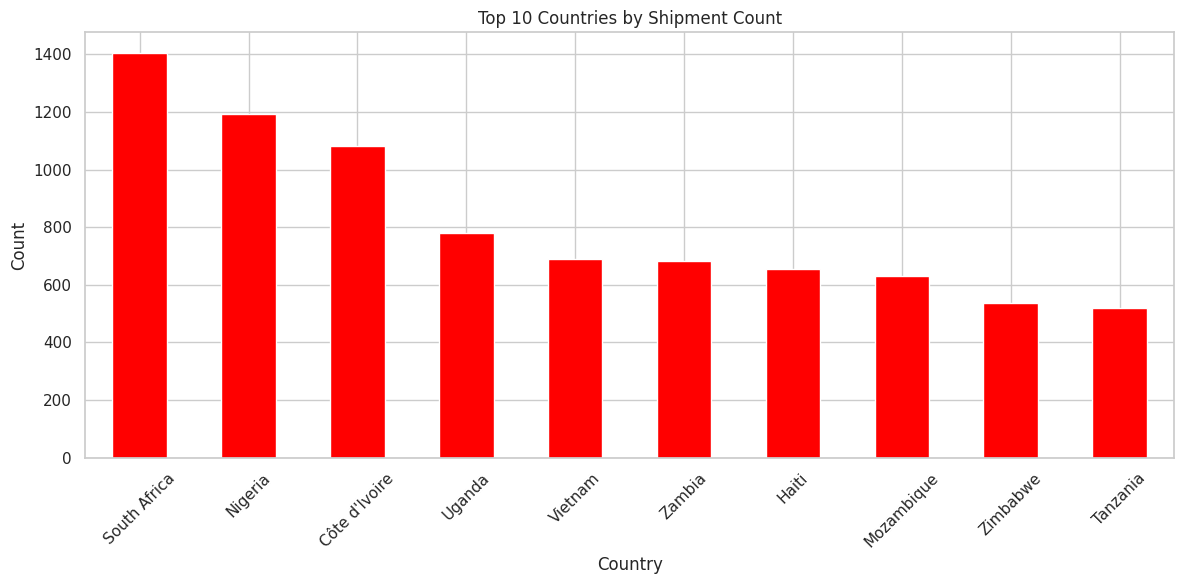

In [ ]:
plt.figure(figsize=(12, 6))
df['Country'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries by Shipment Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This bar chart effectively displays ranked categorical data, allowing for clear visual comparison of shipment volumes across different countries. The descending order arrangement helps immediately identify the highest-volume destinations and the relative differences between them.

#### 2. What is/are the insight(s) found from the chart?

South Africa leads with approximately 1,400 shipments, followed by Nigeria (~1,200) and Côte d'Ivoire (~1,100).

There's a significant drop (about 25%) between the top 3 countries and Uganda (~780 shipments).

The middle tier countries (Vietnam, Zambia, Haiti, Mozambique) have similar shipment volumes (600-700 range).

Zimbabwe and Tanzania have the lowest counts among the top 10, with roughly 520-540 shipments each.

African nations dominate the top 10 list (8 out of 10 countries), with only Vietnam and Haiti representing other regions.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The clear concentration in African markets provides focus for logistics optimization and relationship development.

The top three countries represent significant volume and could be leveraged for negotiating better rates or establishing dedicated shipping routes.

2.Potential negative impacts:

The limited representation of non-African countries might suggest underdeveloped market potential in other regions.

Without context on growth trends, it's unclear if the company is effectively expanding into new markets or becoming too concentrated in existing ones.

#### Distribution of Delivery Delay (Days)

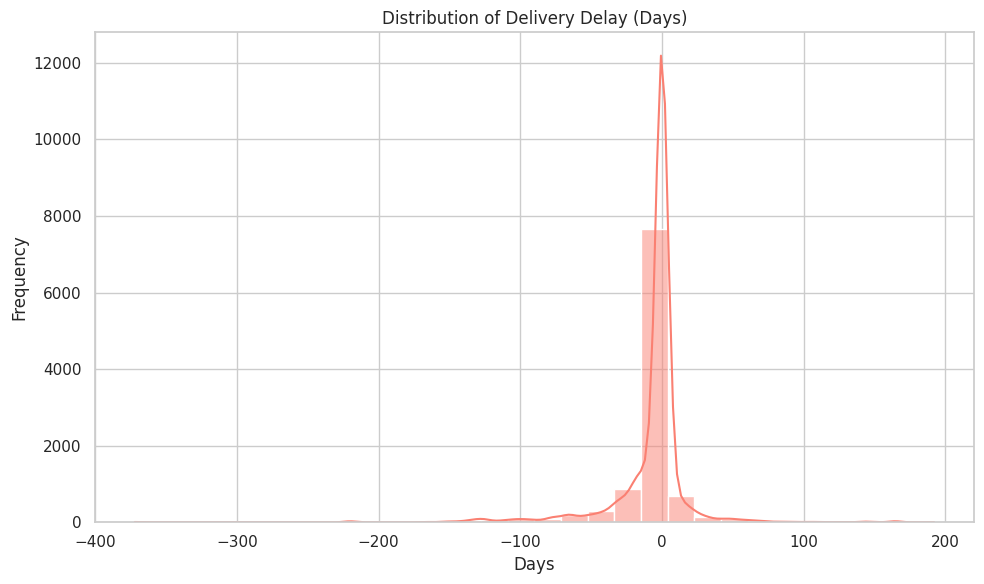

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery Delay (Days)'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Delivery Delay (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This histogram with density curve is ideal for showing the distribution of a continuous variable like delivery delays. It effectively visualizes both the frequency at specific delay values and the overall pattern of the distribution, making it easy to identify central tendencies, outliers, and the shape of the distribution.

#### 2. What is/are the insight(s) found from the chart?

There's a pronounced peak centered around 0 days, indicating that most shipments arrive on time or very close to their scheduled delivery date.

The distribution has a long left tail extending to approximately -200 days, suggesting some shipments arrive significantly earlier than scheduled.

There's a smaller right tail extending to about +50 days, representing late deliveries.

The distribution is asymmetric, with more early deliveries than late ones
There are some outliers at approximately -200, -100, and +200 days.

The frequency at the peak (0 days) is extremely high (~12,000), showing strong on-time performance overall.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The strong concentration around zero days indicates excellent delivery reliability for most shipments.

Early deliveries (negative values) appear more common than late deliveries, which is generally preferable from a customer satisfaction perspective.

2.Potential negative impacts:

The extreme early deliveries (around -100 to -200 days) might indicate scheduling or planning issues, potentially leading to inefficient resource utilization.

Very early deliveries could create storage problems for customers not prepared to receive goods significantly ahead of schedule.

The outliers on both ends suggest some systemic issues in delivery estimation that could be addressed.

#### Boxplot of Line Item Value

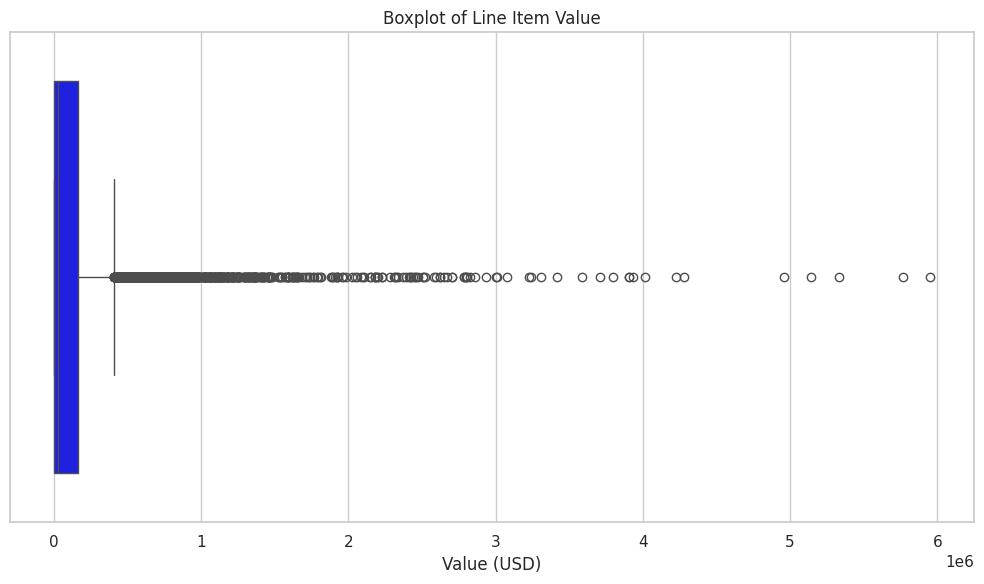

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Line Item Value'], color='blue')
plt.title('Boxplot of Line Item Value')
plt.xlabel('Value (USD)')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This boxplot is ideal for showing the distribution of line item values, particularly when examining the central tendency, spread, and identifying outliers. It effectively displays the median, quartiles, and extreme values of the dataset in a compact visual format, making it easy to understand the overall distribution shape and identify unusual values.

#### 2. What is/are the insight(s) found from the chart?

The distribution is extremely right-skewed, with the box (representing the 25th to 75th percentiles) compressed near zero.

The median (line within the box) appears very close to zeroMost line items have relatively low values, with the majority appearing to be under $500,000.

There's a long right tail with numerous outliers extending to approximately $6 million.

The outliers are distributed across the higher value range, with clusters around 3 to 4 million and exteme values at 5 to 6 million.

The blue box (interquartile range) is very compressed, indicating little variation among the majority of lower-value items.


#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Understanding this highly skewed distribution helps with inventory management and financial planning.

Identifying the high-value outliers enables focused risk management and special handling for these exceptional items.

The large number of low-value items might present opportunities for order consolidation or shipping optimization.

2.Potential negative impacts:

The extreme concentration of low-value items might indicate inefficiency in handling many small orders.

The extreme outliers could represent disproportionate risk to the business if these high-value shipments encounter problems.

Without proper segmentation strategies, the company might be applying the same processes to very different value categories.

#### Distribution of Product Weights

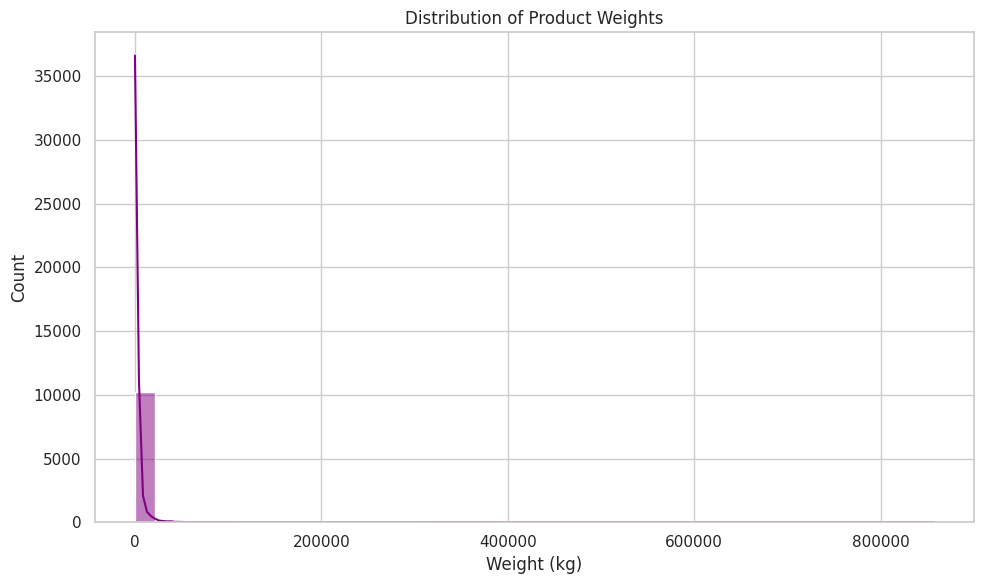

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight (Kilograms)'], bins=40, kde=True, color='purple')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (kg)')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This type of visualization is ideal for showing the frequency distribution of a continuous variable like weight. It effectively displays the overall shape of the distribution, concentration points, and any outliers in the dataset.

#### 2. What is/are the insight(s) found from the chart?

Extreme right-skew distribution: The vast majority of products are concentrated at very low weights (near 0 kg).

Very high peak count: There appears to be approximately 35,000+ products at the lowest weight range.

Long tail: While most products are lightweight, the distribution has a long tail extending to around 800,000 kg.

Sharp decline: There's a dramatic drop-off after the initial peak, with very few products weighing more than 50,000 kg.

Bimodal pattern: There appears to be a small secondary peak around the 10,000-20,000 kg range, suggesting a distinct product category.

Near-zero volume for heavy products: The count for high-weight products (200,000+ kg) is nearly imperceptible on the chart.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Warehouse optimization: Understanding that most products are lightweight allows for optimizing storage facilities for small items while allocating limited space for heavy outliers.

Shipping strategy refinement: The company can focus logistics resources on lightweight item handling while developing specialized solutions for the rare heavy shipments.

Packaging standardization: With most products in a similar weight class, standardized packaging solutions can be developed for the majority of inventory.

2.Potential negative impacts:

Resource misallocation: If management focuses exclusively on the high-volume lightweight segment while ignoring the outliers, they might miss specialized high-value opportunities.

Inventory categorization issues: The extreme skew might mask important sub-categories of products that require different handling procedures.

Pricing model limitations: If pricing is based on weight averages, it could severely undercharge for the outlier heavy items.

Supply chain vulnerability: If the few heavy items are critical components, their unique handling requirements might create bottlenecks.

#### Top 10 Vendors by Shipment Count

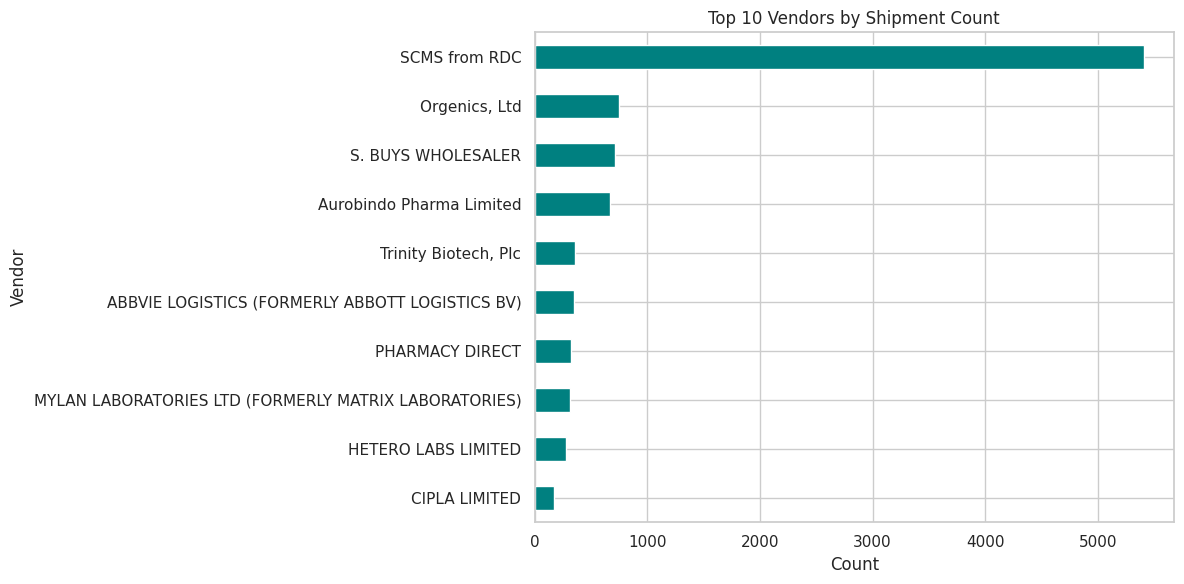

In [ ]:
plt.figure(figsize=(12, 6))
df['Vendor'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Vendors by Shipment Count')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This horizontal bar chart effectively displays ranked categorical data, making it easy to compare vendor shipment volumes. The horizontal orientation works particularly well for displaying the vendor names, which would be difficult to read on a traditional vertical bar chart without rotating the text.

#### 2. What is/are the insight(s) found from the chart?

SCMS from RDC dominates the vendor landscape with approximately 5,000 shipments, far exceeding all other vendors.

There's an extreme disparity between the top vendor and all others - SCMS from RDC accounts for more shipments than all other top 10 vendors combined.

The second tier vendors (Orgenics, S. BUYS WHOLESALER, and Aurobindo Pharma) each handle roughly 500-700 shipments.

The remaining vendors handle progressively smaller volumes, with CIPLA LIMITED having the fewest shipments among the top 10.

Most of the top vendors appear to be pharmaceutical companies or medical suppliers (Aurobindo, Trinity Biotech, AbbVie, Mylan, Hetero Labs, CIPLA).

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The clear identification of SCMS from RDC as the dominant vendor provides focus for relationship management and optimization efforts.

Understanding this vendor concentration helps prioritize quality control and vendor performance initiatives.

The mix of pharmaceutical vendors suggests this is likely a medical or healthcare supply chain, with specialized requirements.

2.Potential negative impacts:

The extreme dependence on a single vendor (SCMS from RDC) represents significant supply chain risk.

If SCMS experiences disruptions, it would affect a disproportionate number of shipments.

The large gap between the primary vendor and others suggests limited alternative capacity if needed.

#### Top 10 Sub-Classifications

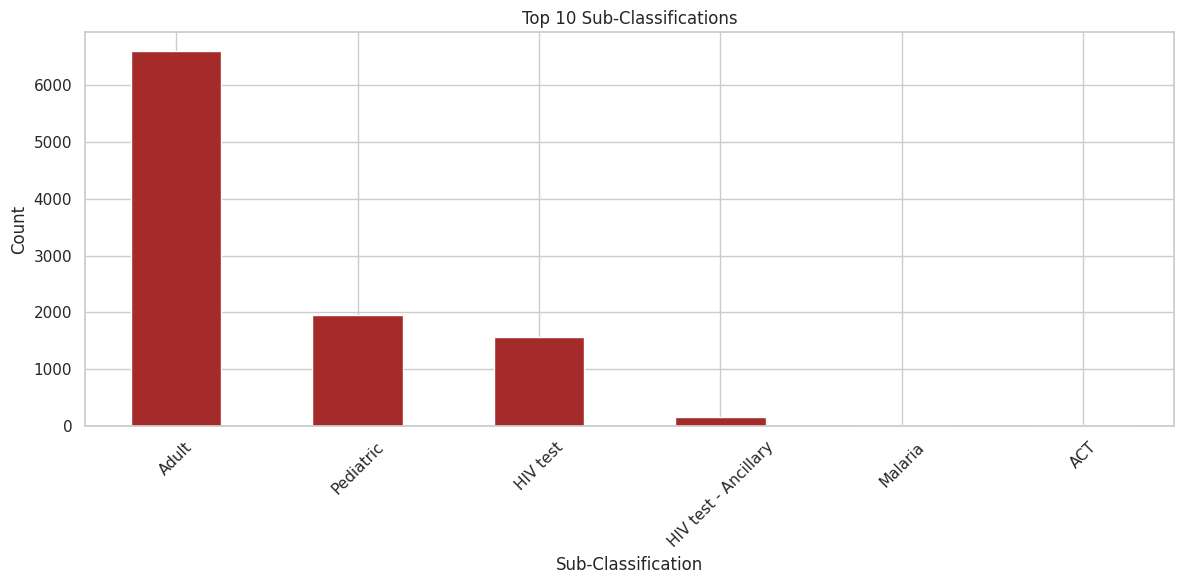

In [ ]:
plt.figure(figsize=(12, 6))
df['Sub Classification'].value_counts().head(10).plot(kind='bar', color='brown')
plt.title('Top 10 Sub-Classifications')
plt.xlabel('Sub-Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This bar chart effectively displays categorical count data, making it easy to compare different product categories by volume. The vertical orientation works well for displaying the category names clearly while showing their relative frequencies.

#### 2. What is/are the insight(s) found from the chart?

Adult products dominate the shipments with approximately 6,500 items, representing a clear majority of shipments.

Pediatric products are the second largest category with about 2,000 items,
HIV test kits form the third largest category with roughly 1,500 items.

HIV test-Ancillary supplies are present but in much smaller quantities (~150)
Malaria and ACT (likely Artemisinin-based Combination Therapy) categories appear to have very minimal counts, barely visible on the chart.

The chart only shows 6 of the promised "Top 10" categories, suggesting the remaining categories may have negligible counts.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The clear product concentration helps focus inventory management and procurement strategies.

Understanding the dominance of adult medications can guide warehouse space allocation and logistics planning.

The focus on HIV testing alongside regular adult and pediatric medications indicates a specialized healthcare supply chain with a public health mission.

2.Potential negative impacts:

The extreme concentration in adult products may indicate a potential gap in pediatric care that could be addressed.

The very low representation of malaria treatments despite the focus on African countries (shown in previous charts) might indicate a misalignment with regional disease burden.

The categorical distribution doesn't show seasonality or trends, which could mask important operational considerations.

#### Distribution of Line Item Quantity

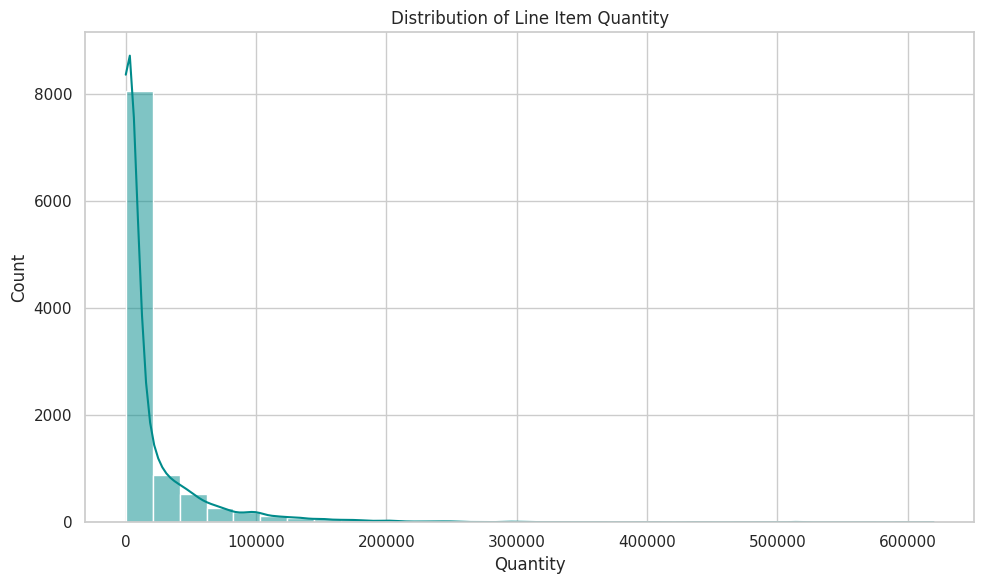

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Line Item Quantity'], bins=30, kde=True, color='darkcyan')
plt.title('Distribution of Line Item Quantity')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This histogram with an overlaid density curve effectively shows the distribution of line item quantities. It's ideal for visualizing the frequency distribution of a continuous variable, highlighting both the precise counts within specific quantity ranges (via the histogram bars) and the overall shape of the distribution (via the density curve).

#### 2. What is/are the insight(s) found from the chart?

The distribution is extremely right-skewed with a very sharp peak near zero,
The vast majority of line items have small quantities (under 25,000 units).

There's a long right tail extending to approximately 300,000 units, indicating some orders with very large quantities.

The highest frequency occurs in the smallest quantity range, suggesting many small-volume orders.

The frequency decreases rapidly as quantity increases, with relatively few orders exceeding 100,000 units.

The density curve confirms the extreme concentration at the lower end of the scale.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Understanding this distribution helps with inventory planning and warehouse space allocation.

The predominance of small-quantity orders might indicate customized, targeted shipments that meet specific needs.

Knowledge of this pattern can inform packaging strategies and shipping container utilization.

2.Potential negative impacts:

The large number of small-quantity shipments likely increases handling costs and administrative overhead per unit.

Small orders may not achieve economies of scale in shipping, potentially leading to higher per-unit costs.

The extreme skew might make forecasting and capacity planning challenging without proper segmentation.

#### Distribution of Computed Unit Price

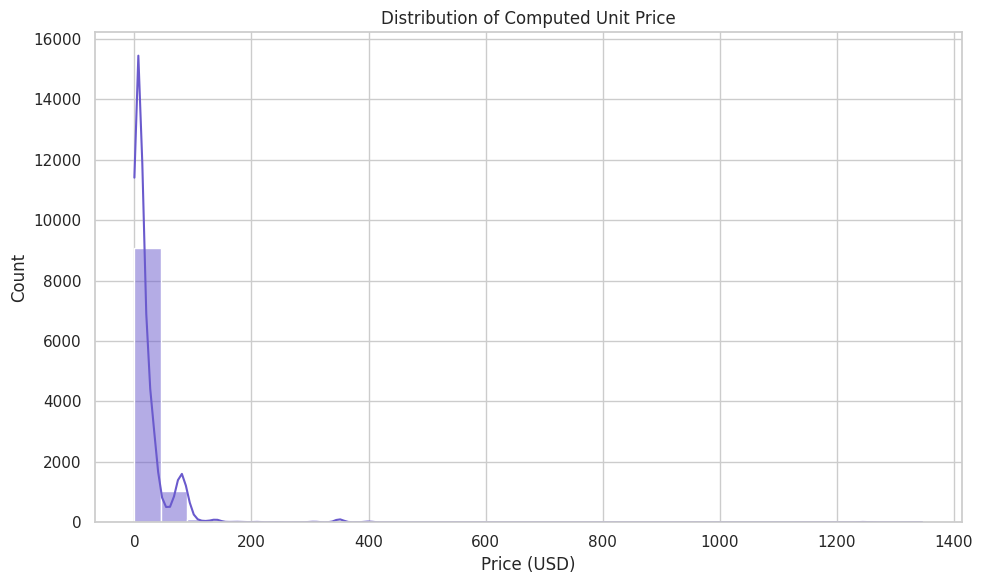

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Computed Unit Price'], bins=30, kde=True, color='slateblue')
plt.title('Distribution of Computed Unit Price')
plt.xlabel('Price (USD)')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

This histogram with density curve effectively visualizes the distribution of unit prices, making it possible to identify price ranges with high frequencies and outliers. The combination of bars and smoothed line helps show both the specific counts within price ranges and the overall shape of the distribution.

#### 2. What is/are the insight(s) found from the chart?

The distribution is extremely right-skewed with a predominant peak near $0-50.

There's a sharp spike at very low price points, suggesting many items cost under $25 per unit.

A secondary smaller peak appears around $100-150.

A tiny third peak is visible around $400.

Most products have relatively low unit prices, with very few items exceeding $200.

The maximum unit price shown on the x-axis is $1,400.

Most activity is concentrated below $200.

The frequency reaches approximately 15,000 at the highest peak, indicating a very large number of low-cost items.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The concentration of low-price items suggests this supply chain is primarily handling affordable medications or basic supplies.

The clear price segmentation (low, mid, high) allows for targeted cost management strategies.

Understanding these price bands can inform procurement strategies and negotiations with suppliers.

2.Potential negative impacts:

The extreme concentration in low-price items might mask the importance of higher-value products.

Low-value items may receive disproportionate attention in metrics despite potentially higher-value items having greater financial impact.

Using expensive air shipping (as seen earlier) for very low-value items may be cost-inefficient.

*BI-VARIATE ANALYSIS-*

#### Pack Price vs. Unit Price

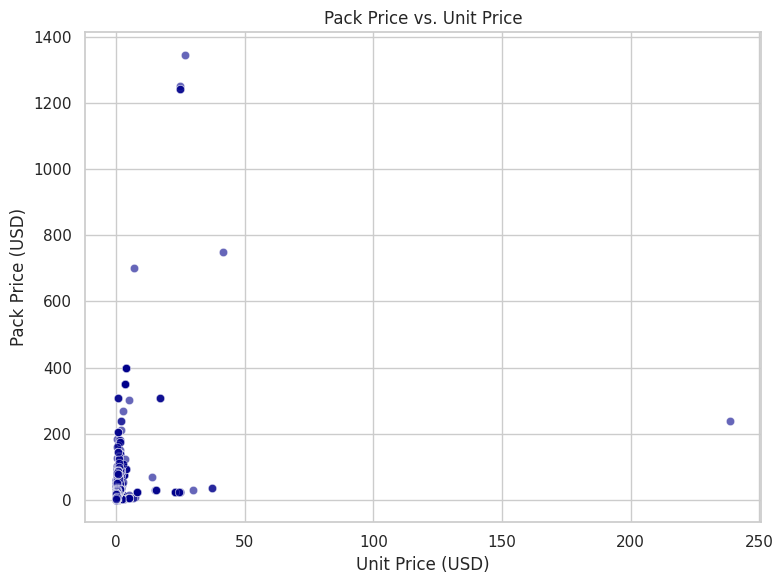

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Unit Price', y='Pack Price', alpha=0.6, color='darkblue')
plt.title('Pack Price vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Pack Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Why did you pick the specific chart?

This scatter plot effectively shows the relationship between two continuous variables - unit price and pack price. It allows us to visualize correlations, clusters, and outliers in the relationship between individual unit costs and the cost of packaged quantities.

#### 2. What is/are the insight(s) found from the chart?

Most data points are clustered in the lower left corner, indicating that most items have both low unit prices and low pack prices under 50 dollars and 200 dollars respectively.

There's no clear linear relationship between unit price and pack price across the entire dataset.

Several outliers are visible, particularly items with relatively low unit prices but high pack prices (around $1,300-$1,400).

There appears to be an isolated point in the far right , approximately 240 dollars unit price, $240 pack price), suggesting items where the pack contains only a single unit.

The vertical alignment of some points along the left side suggests items with very similar unit prices but varying pack prices, likely indicating different package sizes.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Understanding the relationship between unit and pack prices helps with procurement decisions and package size optimization.

The concentration of low unit/pack price items aligns with humanitarian objectives of providing affordable medications.

Identifying outliers (high pack price despite low unit price) could reveal opportunities for package size optimization.

2.Potential negative impacts:

The cluster of items with very low unit prices but varying pack prices might indicate inconsistent packaging strategies.

The absence of points in certain regions suggests potential gaps in the product portfolio that might be worth exploring.

Without information about units per pack, it's difficult to fully interpret some of the patterns.

#### Freight Cost vs. Weight

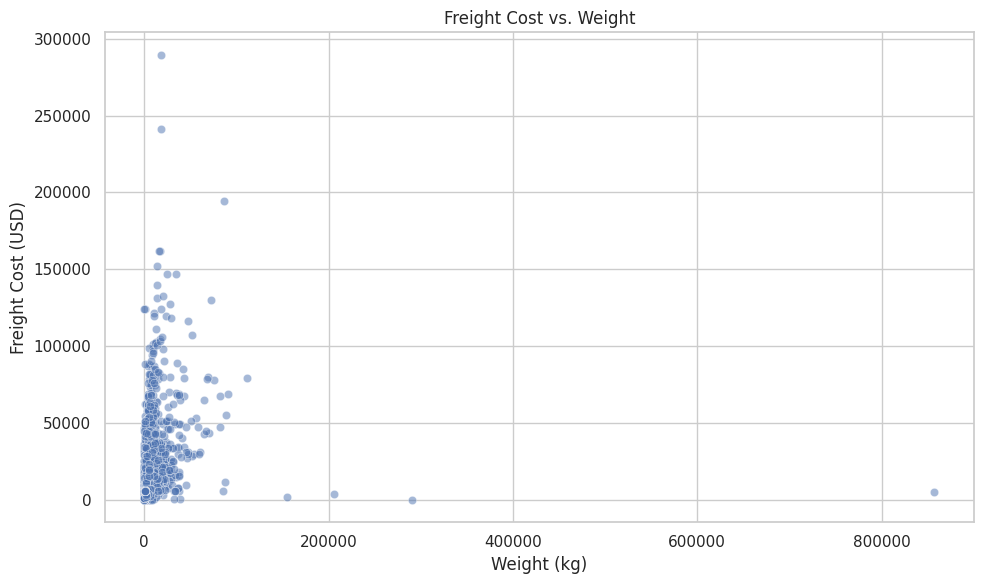

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', data=df, alpha=0.5)
plt.title('Freight Cost vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Freight Cost (USD)')
plt.tight_layout()
plt.show()

#### 1. Why did you pick the specific chart?

This scatter plot effectively visualizes the relationship between shipment weight and freight cost. It's ideal for identifying correlations, patterns, and outliers between these two continuous variables, which is critical for logistics cost analysis.

#### 2. What is/are the insight(s) found from the chart?

Most shipments are clustered in the lower left corner, indicating relatively light shipments (under 50,000 kg) with freight costs mostly below $50,000.

The relationship between weight and cost is not perfectly linear, with significant variation in costs for similar weights.

Several outliers are notable:

A few very expensive shipments (~$200,000-$290,000) despite relatively low weights.

An isolated point at the far right (~850,000 kg) with a relatively modest freight cost.

Several mid-weight shipments (~200,000 kg) with very low freight costs.


The vertical spread of points at low weights suggests that factors beyond weight significantly influence freight costs for lighter shipments.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Understanding the weight-cost relationship helps identify cost-effective shipping strategies and outliers that might represent inefficiencies.

The concentration of light shipments aligns with the medical supplies nature of the operation and the preference for air shipping.

Identifying high-cost outliers provides clear targets for cost optimization efforts

2.Potential negative impacts:

The wide variation in costs for similar weights suggests inconsistent freight pricing or inefficient routing.

Some extremely high-cost shipments relative to weight may indicate emergency shipping or other premium services that could potentially be avoided with better planning.

The heavy use of lightweight, high-cost shipments (likely air freight) may be unnecessarily expensive for non-urgent items.

#### Average Delivery Delay by Country (Top 10)

<ipython-input-25-eb63dc233400>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_delay.index, y=country_delay.values, palette='viridis')


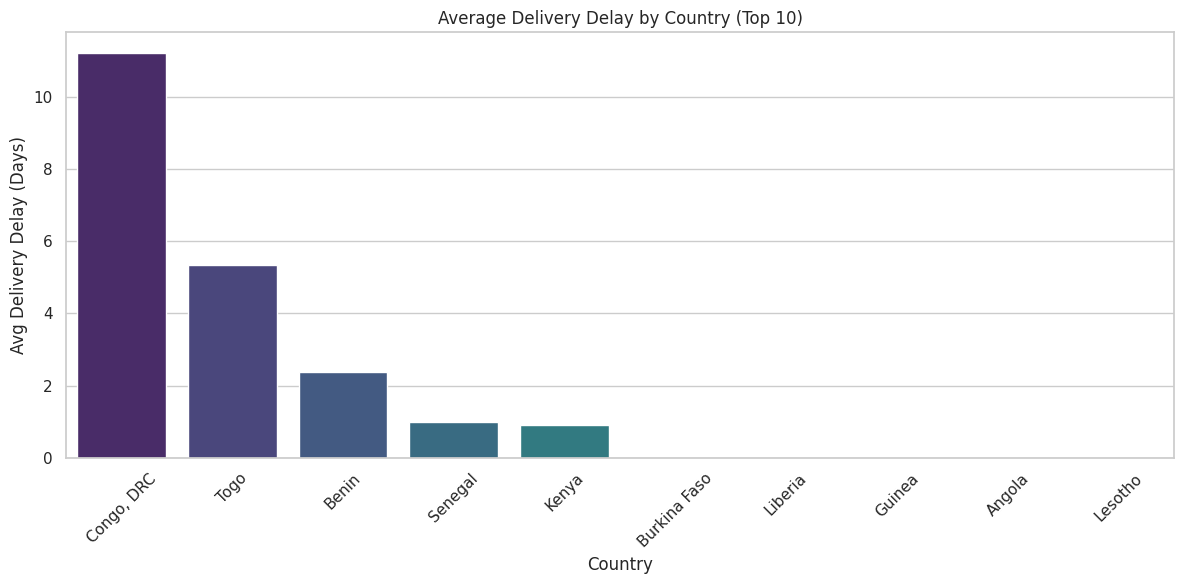

In [ ]:
country_delay = df.groupby('Country')['Delivery Delay (Days)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_delay.index, y=country_delay.values, palette='viridis')
plt.title('Average Delivery Delay by Country (Top 10)')
plt.ylabel('Avg Delivery Delay (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####1. Why did you pick the specific chart?

This bar chart clearly displays the average delivery delays across different countries, allowing for quick visual comparison of performance metrics by destination. It effectively ranks the countries by their average delivery delays, making it easy to identify problematic regions.

#### 2. What is/are the insight(s) found from the chart?

Congo, DRC stands out significantly with the highest average delivery delay of approximately 11 days.

Togo has the second highest delay at around 5.3 days whereas Benin shows moderate delays of about 2.3 days.

Senegal and Kenya have minimal delays of approximately 1 day each and the remaining countries (Burkina Faso, Liberia, Guinea, Angola, and Lesotho) show negligible or zero delivery delays.

There's a clear step-down pattern, with just a few countries experiencing significant delays.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Most countries (at least 6 of the 10 shown) have excellent delivery performance with minimal delays.

The concentrated nature of delays (primarily in Congo DRC and Togo) makes improvement efforts more targeted.

Understanding these country-specific patterns allows for better expectation setting with recipients.

2.Potential negative impacts:

The significant delays in Congo DRC might be undermining program effectiveness for a key market.

Regional patterns may suggest systemic issues with certain transportation routes or customs processes.

Without understanding the causes of these delays, addressing them effectively may be challenging.

#### Average Delivery Delay Over Time

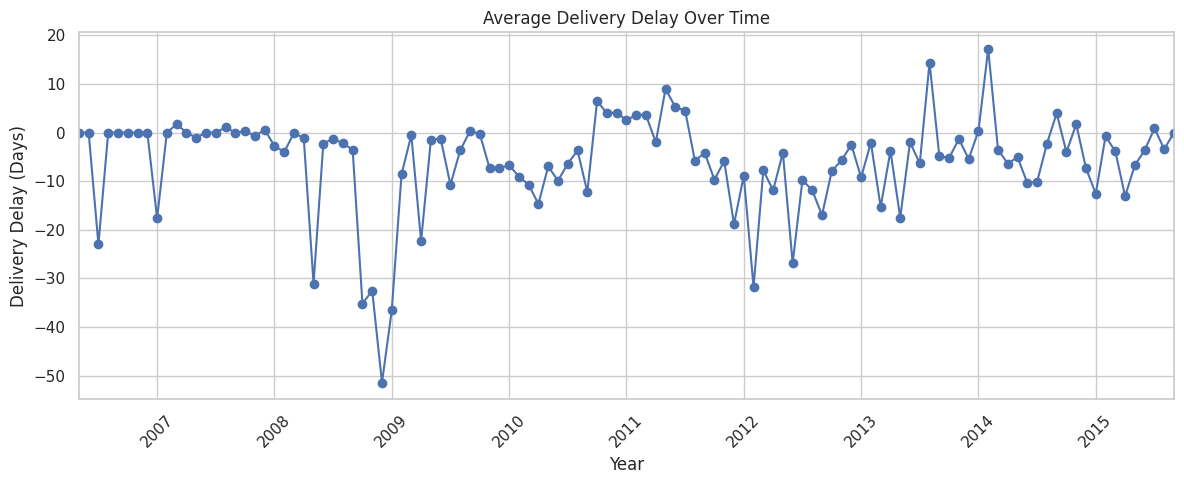

In [ ]:
df['Month_Year'] = df['Delivered to Client Date'].dt.to_period('M')
monthly_delay = df.groupby('Month_Year')['Delivery Delay (Days)'].mean()

plt.figure(figsize=(12, 5))
monthly_delay.plot(marker='o', linestyle='-')
plt.title('Average Delivery Delay Over Time')
plt.ylabel('Delivery Delay (Days)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Why did you pick the specific chart?

This line chart effectively tracks the trend of average delivery delays across time. It's ideal for showing temporal patterns, highlighting fluctuations, and identifying specific periods of significant early or late deliveries. The continuous line helps visualize the progression and changes in performance over the multi-year period.

#### 2. What is/are the insight(s) found from the chart?

There's significant volatility in delivery performance throughout the entire period (2007-2015).

Extreme early deliveries (negative values) occurred in several periods, with the most dramatic being around -50 days in 2009.

Late deliveries (positive values) peaked around 2011 and 2014, with two notable spikes to approximately +15-19 days in 2014.

The volatility appears to have increased in the later years (2012-2015) compared to the earlier period also here are recurring patterns of swinging from early to late deliveries and back again.

Most time periods show early deliveries (below zero line), rather than late deliveries.

#### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

The predominance of early deliveries suggests the supply chain generally operates with buffer time.

Despite the volatility, extreme late deliveries are relatively rare, which is positive for customer satisfaction.

Identifying specific time periods with performance issues enables targeted investigation of historical causes.

2.Potential negative impacts:

The extreme variability in delivery timing makes reliable planning difficult for recipients.

Very early deliveries (e.g., 30-50 days early) may cause storage issues or product expiration concerns.

The lack of stability suggests poor predictability in the supply chain, potentially increasing the need for safety stock.

#### Delivery Delay Distribution by Product Group

<ipython-input-27-a11c7777902f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Product Group'].isin(top_groups)], x='Product Group', y='Delivery Delay (Days)', palette='pastel')


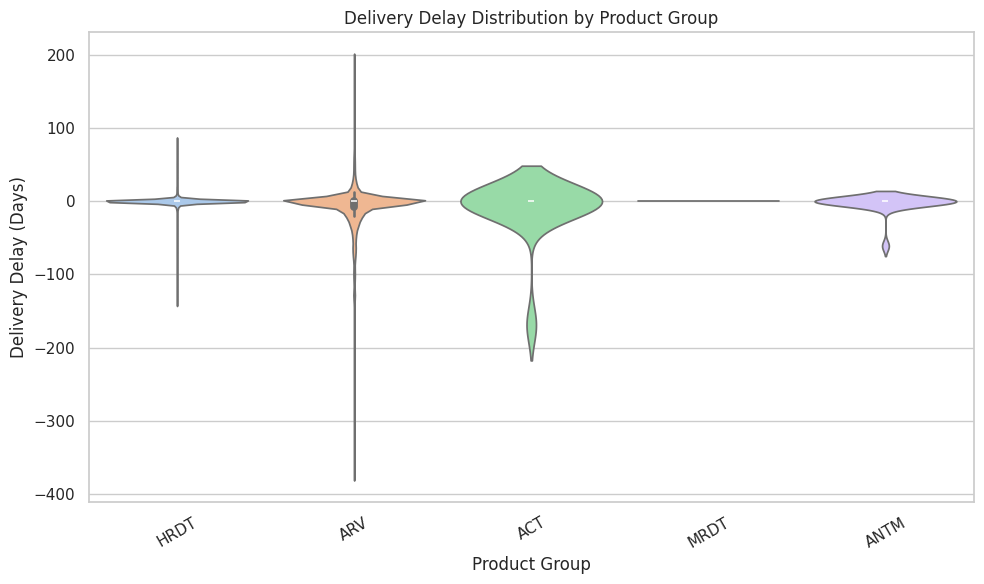

In [ ]:
top_groups = df['Product Group'].value_counts().index[:5]
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[df['Product Group'].isin(top_groups)], x='Product Group', y='Delivery Delay (Days)', palette='pastel')
plt.title('Delivery Delay Distribution by Product Group')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

####1.Why did you pick the specific chart?

This violin plot shows the full distribution of delivery delays across different product groups as well as allows comparison of medians, quartiles, and outliers simultaneously.It reveals the shape and density of data distribution for each group and effectively visualizes where most delays are concentrated for each product line.

####2.What is/are the insight(s) found from the chart?

The ARV product group has the most extreme outliers, with some delays extending to nearly -400 days suggesting very early deliveries.

ACT has the widest distribution in the main body, showing considerable variability in delivery times, with a concentration of delays around 0 to +50 days, but also notable negative delays (early deliveries) extending to about -200 days.

HRDT shows moderate variability with both early and late deliveries, extending from about -150 to +100 days, with most concentrated near 0.

MRDT appears to have the most consistent delivery performance with a very narrow distribution centered close to 0 days of delay.

ANTM shows a moderately narrow distribution, mostly between -50 and +25 days, with a small concentration of delays around -75 days.

#### 3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

MRDT's consistent delivery could serve as a best practice model for other product groups.

The extreme variability in ARV deliveries highlights an area for targeted improvement initiatives.

Resources could be redirected from the well-performing MRDT line to help standardize processes for the more variable product groups.

Understanding which product lines have more predictable delivery times allows for more accurate customer communications.

2.Potential negative impacts:

Potential storage costs for customers not ready to receive products early
Rushed production leading to quality issues.

The extreme delays in ARV might indicate fundamental process issues that could damage customer relationships if not addressed.

Focusing only on reducing late deliveries without addressing the full variability could miss the bigger operational issues causing instability.

#### Shipment Mode by Fulfillment Type

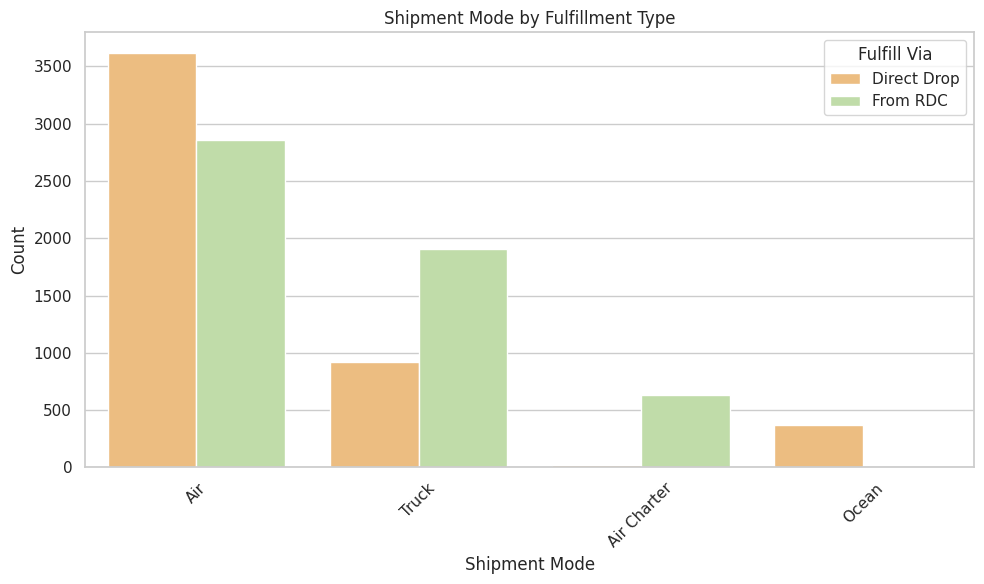

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Shipment Mode', hue='Fulfill Via', palette='Spectral')
plt.title('Shipment Mode by Fulfillment Type')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.Why did you pick the specific chart?

It compares two categorical variables (shipment mode and fulfillment type) simultaneously,also shows count distribution across different transportation methods.It makes visual comparison between Direct Drop and RDC fulfillment easy for each shipping mode as well as allows for clear identification of exclusive usage patterns (like Air Charter only for RDC and Ocean only for Direct Drop).

#### 2.What is/are the insight(s) found from the chart?

Air is the dominant shipment mode for both fulfillment types, but particularly for Direct Drop.

RDC fulfillment uses a more balanced mix of transportation modes than Direct Drop.

Some modes are exclusive to specific fulfillment types: Air Charter only used for RDC fulfillment while Ocean shipping is only used for Direct Drop.

Truck transportation is used significantly more for RDC fulfillment than Direct Drop.

Direct Drop relies heavily on Air transportation, suggesting speed priority for this fulfillment strategy.

####3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

Can optimize transportation costs by analyzing the heavy reliance on expensive air shipping.

May identify opportunities to shift some Direct Drop air shipments to more cost-effective modes.

Could evaluate why some modes are exclusive to certain fulfillment types and whether expanding their use would be beneficial.

2.Potential negative impacts:

The exclusive use of ocean shipping for Direct Drop might indicate limited flexibility in supply chain design.

Heavy reliance on air shipping suggests potentially higher transportation costs that could impact margins.

The absence of Direct Drop in Air Charter suggests possible limitations in emergency fulfillment capabilities for direct shipments.

####Average Freight Cost by Shipment Mode

<ipython-input-29-c3367fd7eb5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_freight_by_mode.index, y=avg_freight_by_mode.values, palette='viridis')


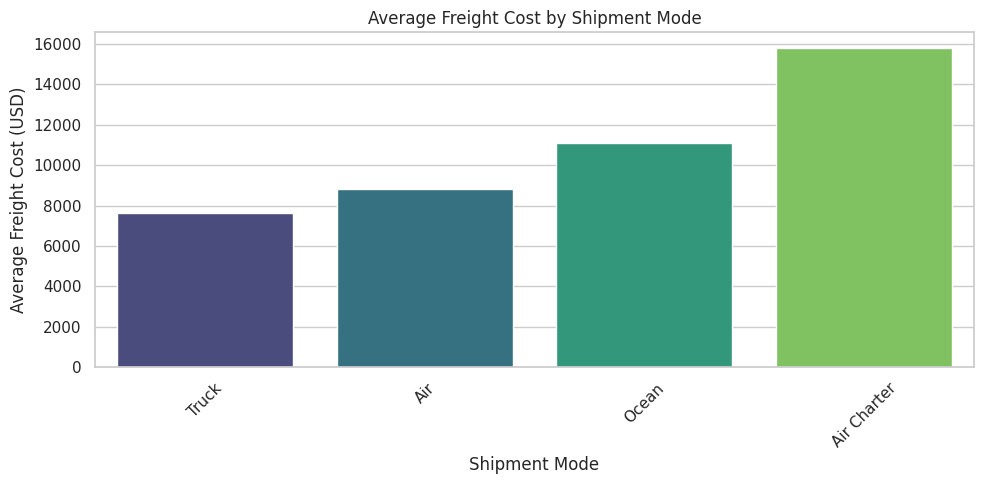

In [ ]:
plt.figure(figsize=(10, 5))
avg_freight_by_mode = df.groupby('Shipment Mode')['Freight Cost (USD)'].mean().sort_values()
sns.barplot(x=avg_freight_by_mode.index, y=avg_freight_by_mode.values, palette='viridis')
plt.title('Average Freight Cost by Shipment Mode')
plt.ylabel('Average Freight Cost (USD)')
plt.xlabel('Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####1.Why did you pick the specific chart?

This bar chart was chosen because it clearly displays the average freight cost for each shipment mode in a straightforward, easy-to-compare format. The vertical bars allow for quick visual comparison of costs across different transportation methods. This chart type works well for comparing a single quantitative variable (cost) across categorical data (shipment modes).

#### 2.What is/are the insight(s) found from the chart?

Air Charter is the most expensive shipment mode by a significant margin, averaging approximately $15,500 USD per shipment.

Ocean shipping is the second most expensive mode at around $11,000 USD per shipment.

Regular Air freight costs about $8,700 USD per shipment.

Truck transportation is the most economical option at approximately $7,500 USD per shipment.

There is a clear cost hierarchy: Truck < Air < Ocean < Air Charter.

The cost difference between the most expensive (Air Charter) and least expensive (Truck) modes is roughly $8,000 USD per shipment.

####3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive business impacts:

This data provides clear cost benchmarks for transportation budgeting and financial planning.

When combined with the previous shipment volume chart, it reveals significant cost optimization opportunities, particularly given the heavy reliance on Air shipping.

Strategic shifting of non-urgent shipments from Air to Truck could yield substantial savings.

2.Potential negative impacts:

Focusing solely on cost reduction by shifting to cheaper modes could negatively impact delivery times and customer satisfaction.

The notably high cost of Ocean shipping is counterintuitive (typically cheaper than air) and might indicate inefficiencies in ocean freight management or unusual routing.

If decisions are made based solely on this chart without considering other factors (time sensitivity, volume capacity, route availability), it could lead to suboptimal logistics strategies.

*MULTI-VARIATE ANALYSIS-*

####Faceted ScatterPlot Grid

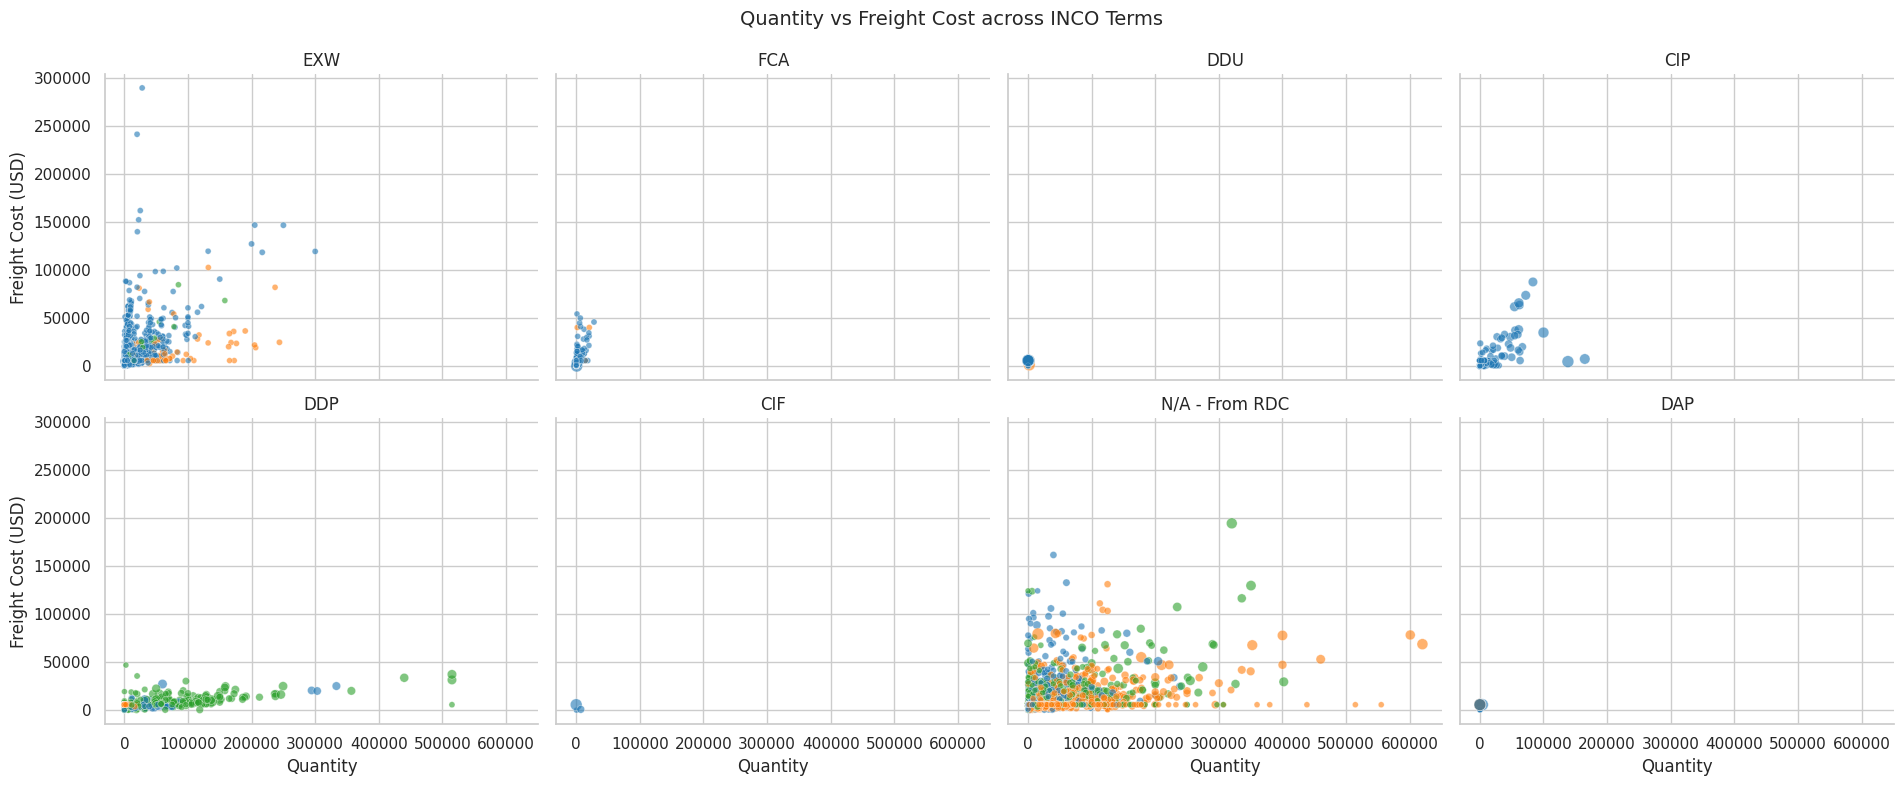

In [ ]:
g = sns.FacetGrid(df, col="Vendor INCO Term", col_wrap=4, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="Line Item Quantity", y="Freight Cost (USD)",
                size="Weight (Kilograms)", hue="Shipment Mode", alpha=0.6, palette='tab10', legend=False)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Quantity", "Freight Cost (USD)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Quantity vs Freight Cost across INCO Terms", fontsize=14)
plt.show()


####1.Why did you pick the specific chart?

It allows direct comparison across multiple INCO terms in a single view.
The scatter plot format reveals patterns, outliers, and correlations between quantity and cost.Having separate panels for each INCO term makes it easier to identify which terms are used most frequently and which show different cost behaviors

####2.What is/are the insight(s) found from the chart?


EXW (Ex Works) shows the highest usage frequency and cost variability, with freight costs ranging from near 0 to $300,000, and several high-cost outliers even at low quantities.

N/A - From RDC shows the second highest usage with widely scattered data points and costs up to $200,000.

FCA (Free Carrier) demonstrates more consistent pricing with tighter clustering of costs, generally lower than EXW.

DDP (Delivered Duty Paid) shows moderate usage with relatively controlled costs, mostly under $50,000.

CIP (Carriage and Insurance Paid To) displays a clear positive correlation between quantity and cost.

DDU (Delivered Duty Unpaid), CIF (Cost, Insurance and Freight), and DAP (Delivered at Place) show minimal usage.

Most shipping activity across all terms involves smaller quantities (clustered at the left side of the x-axis).

The significant cost variation within similar quantity ranges suggests opportunities for shipping term optimization.

These patterns indicate that shipping term selection significantly impacts freight costs, with some terms offering more predictable pricing structures than others.

#### Correlation Heatmap

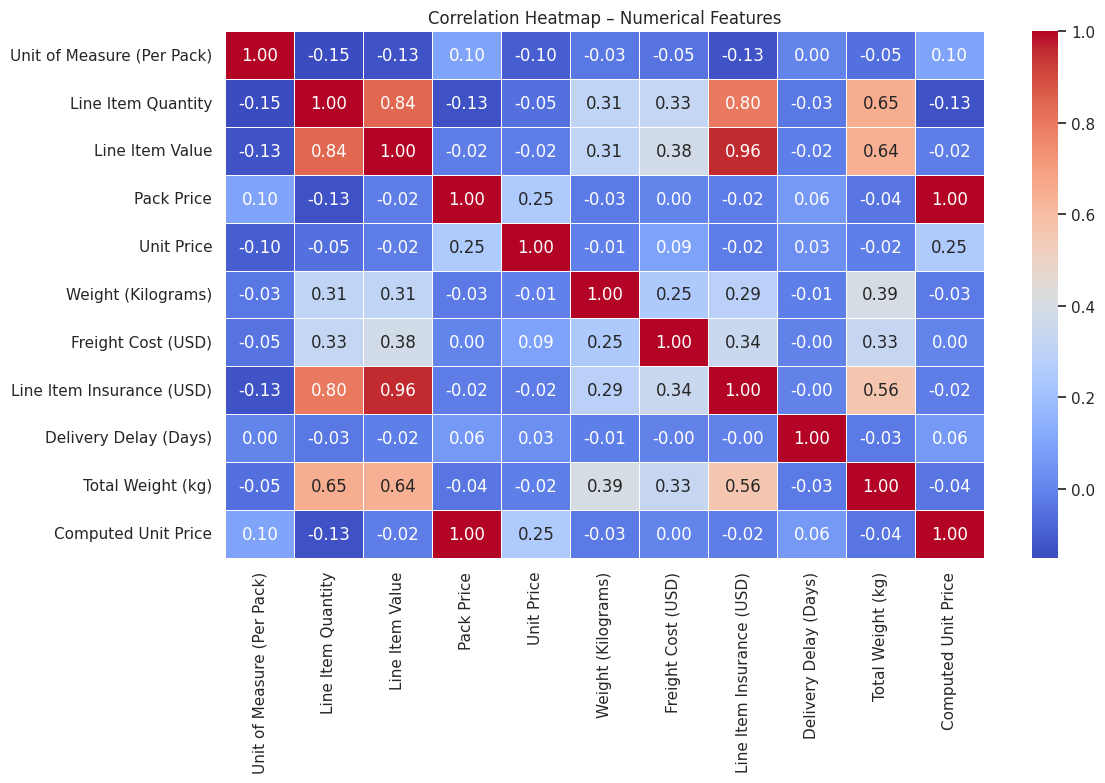

In [ ]:
plt.figure(figsize=(12, 8))
numerical_cols = ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price',
                  'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)',
                  'Delivery Delay (Days)', 'Total Weight (kg)', 'Computed Unit Price']

corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap – Numerical Features')
plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

Correlation heatmaps make it easy to identify patterns, dependencies, and potential redundancies in data by using color intensity to represent correlation strength.

#### 2. What is/are the insight(s) found from the chart?

Line Item Value and Line Item Insurance have an extremely strong correlation (0.96), suggesting insurance is calculated as a percentage of item value.

Pack Price and Computed Unit Price show perfect correlation (1.00), indicating redundancy in these measures.

Line Item Quantity strongly correlates with both Line Item Value (0.84) and Line Item Insurance (0.80).

Total Weight correlates moderately with Line Item Quantity (0.65) and Value (0.64).

Freight Cost has moderate correlations with Line Item Value (0.38), suggesting value-based pricing.

Delivery Delay shows virtually no correlation with any financial or physical measurements, indicating delays are influenced by factors not captured in this dataset.

Weight measurements correlate with costs but not strongly, suggesting multiple factors impact pricing beyond just weight.

#### Pair Plot

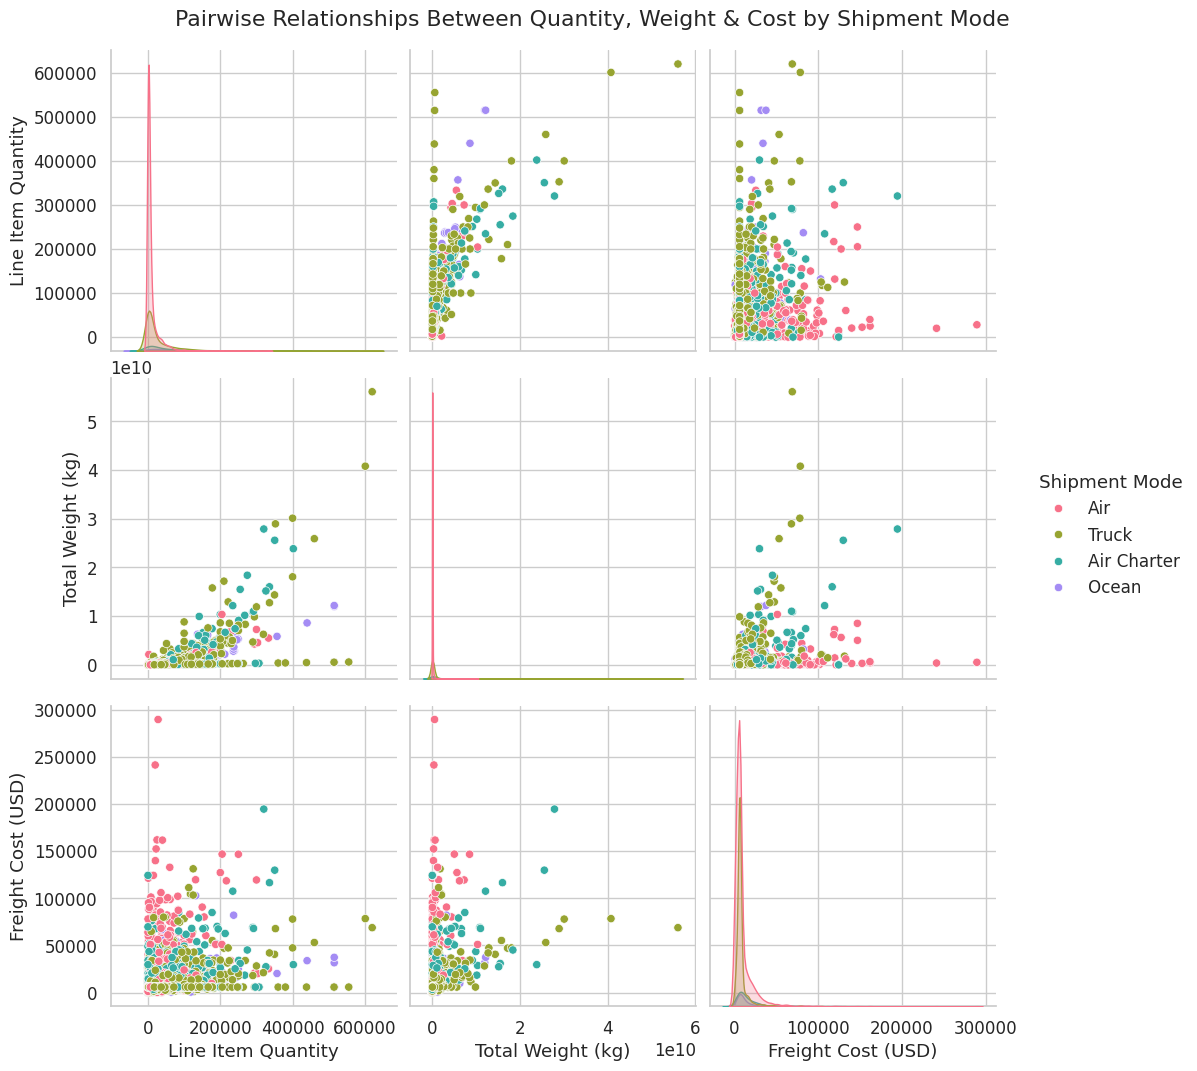

In [ ]:
selected = df[['Line Item Quantity', 'Total Weight (kg)', 'Freight Cost (USD)', 'Shipment Mode']]

# Set larger figure size
sns.set_context("notebook", font_scale=1.1)
sns.pairplot(selected, hue='Shipment Mode', palette='husl', height=3.5)

plt.suptitle('Pairwise Relationships Between Quantity, Weight & Cost by Shipment Mode', y=1.02)
plt.show()

#### 1. Why did you pick the specific chart?

This pair plot matrix is excellent for simultaneously examining relationships between three key shipping variables (Quantity, Weight, and Cost) across different shipment modes. The chart format allows for easy comparison of how these variables interact with each other across different transportation methods.

#### 2. What is/are the insight(s) found from the chart?

Air shipments (red) show high freight costs even for lower quantities and weights, confirming air transport's premium pricing.

Truck shipments (olive) handle the highest quantities (up to 600,000 units) and heaviest loads (up to 6×10^10 kg) with relatively moderate costs.

Air Charter (teal) shows moderate costs for mid-range quantities and weights, positioning it between regular air and truck shipping.

Weight and quantity show a positive correlation across all shipment modes, as expected.

Air shipping appears to be used for lower volume, lower weight, time-sensitive shipments that command premium prices.

Ocean shipping (purple) appears less frequently but handles moderate-to-high quantities.

Cost distributions (diagonal plots) show that most freight costs cluster at lower values with a long tail of expensive shipments.

Truck shipping demonstrates better cost efficiency for large quantities, while air shipping costs escalate quickly with quantity.

Some outliers exist in each mode, particularly in the cost dimension, suggesting special circumstances or priority shipments.

These patterns highlight how shipment mode selection impacts cost structures and reveals the operational niches each transport method serves in the logistics network.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Optimize INCO Term Usage for Predictable Cost Structures-

Recommendation:
Prioritize the use of FCA and CIP terms, which demonstrate more consistent and predictable cost behaviors, over EXW and N/A-RDC, which show wide cost variability.

Impact:

Reduces cost uncertainty and enhances forecasting accuracy.

Action Step:

Develop clear internal guidelines for INCO term selection based on shipment weight and quantity thresholds to ensure consistent usage across operations.

2. Stratify Logistics Operations Based on Shipment Weight-

Recommendation:

Establish a two-tiered logistics system:

One for the high-frequency lightweight shipments.

Another for infrequent, heavy-weight shipments requiring specialized handling.

Impact:

Enhances efficiency by standardizing packaging and transport processes for the most common shipment type while still accommodating outliers.

Action Step:

Define standard operating procedures (SOPs) and handling protocols per tier.

3. Align Transportation Modes with Shipment Urgency and Value-

Recommendation:

Develop a decision framework that reserves air shipping for high-priority, low-volume shipments and redirects high-volume, less-urgent deliveries to ocean or truck transport.

Impact:

Significantly reduces cost per shipment while maintaining service levels.

Action Step:

Implement a mode optimization algorithm that factors in urgency, value, weight, and destination for each shipment.

4. Reduce Shipment Cost Variability Through Standardization-

Recommendation:

Address the cost inconsistencies within similar shipment profiles by:

Standardizing shipping procedures.

Automating INCO term and mode selection based on historical cost patterns.

Impact:

Stabilizes cost metrics, making budgeting and planning more reliable.

Action Step:

Integrate cost prediction models into the shipment planning process to guide decisions.

5. Implement Tiered Shipping Strategy Based on Urgency and Value-

Recommendation:

Segment shipments into tiers (e.g., urgent vs. non-urgent, high vs. low value) and assign the most cost-effective transport mode accordingly.

Impact:

Reduces overuse of air freight for non-critical deliveries, cutting down transportation expenses.

Action Step:

Establish operational rules and flags in the logistics system to route shipments by priority.

6. Develop Country-Specific Logistics Strategies for Delay-Prone Destinations-

Recommendation:

Create targeted improvement plans for high-delay countries (e.g., Congo DRC, Togo) by improving documentation processes, exploring alternative entry routes, or strengthening partnerships.

Impact:

Enhances delivery reliability and reduces late shipments in challenging regions.

Action Step:

Perform root cause analysis for each country and implement localized solutions.

7. Consolidate Low-Value, Small Shipments-

Recommendation:

Aggregate small, low-value shipments destined for the same regions to achieve cost efficiency and reduce administrative overhead.

Impact:

Lowers shipping frequency and handling costs while improving bulk rate advantages.

Action Step:

Leverage shipment scheduling tools to bundle deliveries with similar timelines and destinations.

8. Improve Delivery Forecasting and Scheduling Consistency-

Recommendation:

Enhance forecasting models using historical delivery performance data to better predict lead times and reduce variability.

Impact:

Increases customer satisfaction by minimizing both early and late deliveries.

Action Step:

Implement machine learning-based delivery prediction tools integrated with operational planning.

9. Enhance Vendor and Fulfillment Channel Optimization-

Recommendation:

Reduce dependency on SCMS from RDC and diversify supplier base. Evaluate performance and cost efficiency of Direct Drop vs RDC fulfillment.

Impact:

Reduces supply chain risk and supports more flexible, cost-effective delivery routes.

Action Step:

Conduct a supplier performance audit and pilot alternative sourcing strategies.

10. Price Optimization Based on Shipment Attributes-

Recommendation:

Adjust insurance charges based on shipment value (noting the 0.96 correlation).

Create freight pricing models reflecting weight and value dynamics.

Implement volume-based pricing tiers.

Impact:

Aligns pricing more closely with actual risk and cost, improving margin control.

Action Step:

Redesign pricing structure based on data insights and implement in logistics cost calculators.


# **Conclusion**

The analysis of the SCMS delivery dataset reveals multiple opportunities for FedEx Logistics to improve operational efficiency and reduce costs within its global supply chain network. Key findings highlight excessive reliance on costly air freight, inconsistent INCO term usage, shipment cost variability, and regional delivery delays.

By adopting a tiered logistics strategy, aligning transportation modes with shipment characteristics, and optimizing INCO terms and vendor relationships, FedEx can achieve substantial cost savings while maintaining the responsiveness required for humanitarian missions. Additionally, targeted improvements in delivery forecasting and country-specific logistics planning can mitigate regional inefficiencies and improve service levels.

These data-driven recommendations support the overarching business objective of enhancing delivery efficiency, controlling logistics costs, and ensuring reliable supply of essential medical goods to vulnerable regions. Implementing these strategic actions will enable FedEx Logistics to build a more resilient, scalable, and cost-effective supply chain.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***